# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fitria Anggraini
- **Email:** ftranggra23@gmail.com
- **ID Dicoding:** ftriaanggra23

## Menentukan Pertanyaan Bisnis

- Bagaimana pola temporal tingkat polusi udara serta distribusi kualitas udara dari tahun 2013 hingga 2017?
- Kota manakah yang memiliki tingkat polusi udara tertinggi dan terendah berdasarkan rata-rata PM2.5, dan bagaimana perbandingannya dengan polutan lainnya?
- Bagaimana hubungan faktor cuaca (suhu, kelembaban, curah hujan) dengan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [125]:
!pip install scipy

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import scipy.stats as stats
from io import StringIO

## Data Wrangling

### Gathering Data

In [127]:
csv_files = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

base_url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/"

data_frames = [
    pd.read_csv(StringIO(requests.get(base_url + file).text)).assign(station=file.split('_')[2])
    for file in csv_files
]

air_quality = pd.concat(data_frames, ignore_index=True)
air_quality.drop('No', axis=1, inplace=True)

display(air_quality)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
Dataset ini terdiri atas 12 lokasi pemantauan kualitas udara yang digabung menjadi satu. Data mencakup periode 2013-2017 dan memiliki atribut yang sama disetiap lokasi, yaitu:
- year, month, day, hour : waktu pencatatan data
- PM2.5 : Partikel udara berukuran <= 2.5 mikrometer
- PM10 : Particulate matter <= 10 mikrometer
- SO2 : Sulfur Dioksida (polutan dari pembakaran bahan bakar fosil)
- NO2 : Nitrogen Dioksida (polutan dari kendaraan dan industri)
- CO : Karbon Monoksida
- O3 : Ozon
- TEMP : Suhu (Derajar Celcius)
- PRES : Tekanan Atmosfer (hPa)
- DEWP : Titik Embun (dew point) dalam Derajat Celcius
- RAIN : Curah Hujan (mm)
- wd : Arah angin
- WSPM : Kecepatan angin (m/s)
- station : Lokasi pemantauan kualitas udara

### Assessing Data

##Menilai tabel air_quality_df

In [128]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


**Insight:**
Terdapat beberapa kolom yang memiliki jumlah Non-Null Count yang lebih kecil dari total 420768 entri, artinya terdapat missing value dalam data.

In [129]:
air_quality.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701
O3,13277


**Insight:**
Tabel diatas menunjukkan bahwa terdapat missing value di beberapa kolom, antara lain:
- PM2.5 terdapat 8739 data yang hilang
- PM10 terdapat 6449 data yang hilang
- SO2 terdapat 9021 data yang hilang
- NO2 terdapat 12116 data yang hilang
- CO terdapat 20701 data yang hilang
- O3 terdapat 13277 data yang hilang
- TEMP terdapat 398 data yang hilang
- PRES terdapat 393 data yang hilang
- DEWP terdapat 403 data yang hilang
- RAIN terdapat 390 data yang hilang
- wd terdapat 1822 data yang hilang
- WSPM terdapat 318 data yang hilang

Masalah tersebut akan kita bersihkan pada tahap cleaning data.

In [130]:
print("Jumlah Duplikasi: ", air_quality.duplicated().sum())

Jumlah Duplikasi:  0


In [131]:
air_quality.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

###Menangani missing values
- Menggunakan rata-rata berbasis jam dan bulan per lokasi untuk menangani kolom yang memiliki banyak missing values seperti PM2.5, PM10, SO2, NO2, CO, O3
- Untuk kolom yang sedikit missing values menggunakan interpol linier untuk mempertahankan pola perubahan pada data cuaca
- Menangani missing value pada kolom wd menggunakan modus per lokasi dan jam

In [132]:
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    air_quality[col] = air_quality.groupby(['station', 'hour', 'month', 'year'])[col].transform(lambda x : x.fillna(x.mean()))

In [133]:
air_quality = air_quality.infer_objects(copy=False)

air_quality[air_quality.select_dtypes(include=["number"]).columns] = (
    air_quality.select_dtypes(include=["number"]).interpolate(method="linear", limit_direction="forward")
)

air_quality.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'], inplace=True)

In [134]:
print(air_quality[air_quality['wd'].isna()])

        year  month  day  hour  PM2.5   PM10   SO2    NO2      CO          O3  \
6388    2013     11   22     4   82.0   74.0  15.0   75.0  1300.0   12.680345   
11718   2014      7    2     6   44.0   44.0   2.0   16.0   800.0  105.000000   
13412   2014      9   10    20   56.0  141.0  13.0   81.0   700.0   99.000000   
16748   2015      1   27    20   26.0   42.0  12.0   78.0  1300.0    2.000000   
17263   2015      2   18     7   13.0   14.0  12.0   22.0   600.0   60.000000   
...      ...    ...  ...   ...    ...    ...   ...    ...     ...         ...   
420018  2017      1   28    18  257.0  281.0  48.0   75.0  2800.0    8.000000   
420038  2017      1   29    14   13.0   46.0   4.0    6.0   300.0   64.000000   
420264  2017      2    8     0  104.0  113.0  17.0   87.0  1900.0    2.000000   
420342  2017      2   11     6   10.0   15.0   7.0   56.0   800.0   17.000000   
420450  2017      2   15    18  259.0  259.0  43.0  127.0  2000.0   36.000000   

          TEMP     PRES   D

In [135]:
print(air_quality['wd'].value_counts())

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


In [136]:
air_quality['wd'] = air_quality.groupby(["station", "hour"])["wd"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

###Validasi cleaning

In [137]:
print(air_quality.isna().sum())

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [138]:
air_quality.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.729027,104.58404,15.842407,50.558021,1235.285334,57.082369,13.531692,1010.753337,2.482421,0.064428,1.730034
std,1.177198,3.448707,8.800102,6.922195,80.088053,91.17351,21.532570,34.803321,1139.341459,56.267973,11.437867,10.474302,13.797675,0.820638,1.246674
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.00000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.00000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,56.000000,83.00000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,110.000000,145.00000,20.000000,71.000000,1500.000000,81.526316,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.00000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


## Exploratory Data Analysis (EDA)

### Explore air_quality_df

In [139]:
air_quality.sample(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
324113,2014,2,19,17,29.0,29.0,71.636364,71.227273,1995.454545,48.318182,3.7,1023.4,-13.6,0.0,SSE,1.9,Tiantan
100743,2016,8,27,15,3.0,8.0,2.000000,2.000000,200.000000,90.000000,31.1,1001.2,6.9,0.0,NW,2.6,Dingling
408119,2015,9,20,23,62.0,98.0,6.000000,56.000000,800.000000,61.000000,22.7,1008.0,12.9,0.0,SSE,1.2,Wanshouxigong
144922,2013,9,11,10,65.0,151.0,22.000000,74.000000,1200.000000,17.000000,24.4,1010.4,14.5,0.0,SSW,0.9,Guanyuan
304673,2015,12,2,17,9.0,10.0,2.000000,27.000000,300.000000,32.000000,2.6,1016.1,-14.6,0.0,WNW,6.1,Shunyi


In [140]:
air_quality.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,420768.0,NaN,NaN,NaN,2014.66256,1.177198,2013.0,2014.0,2015.0,2016.0,2017.0
month,420768.0,NaN,NaN,NaN,6.52293,3.448707,1.0,4.0,7.0,10.0,12.0
day,420768.0,NaN,NaN,NaN,15.729637,8.800102,1.0,8.0,16.0,23.0,31.0
hour,420768.0,NaN,NaN,NaN,11.5,6.922195,0.0,5.75,11.5,17.25,23.0
PM2.5,420768.0,NaN,NaN,NaN,79.729027,80.088053,2.0,21.0,56.0,110.0,999.0
PM10,420768.0,NaN,NaN,NaN,104.58404,91.17351,2.0,36.0,83.0,145.0,999.0
SO2,420768.0,NaN,NaN,NaN,15.842407,21.53257,0.2856,3.0,7.0,20.0,500.0
NO2,420768.0,NaN,NaN,NaN,50.558021,34.803321,1.0265,23.0,43.0,71.0,290.0
CO,420768.0,NaN,NaN,NaN,1235.285334,1139.341459,100.0,500.0,900.0,1500.0,10000.0
O3,420768.0,NaN,NaN,NaN,57.082369,56.267973,0.2142,11.0,44.0,81.526316,1071.0


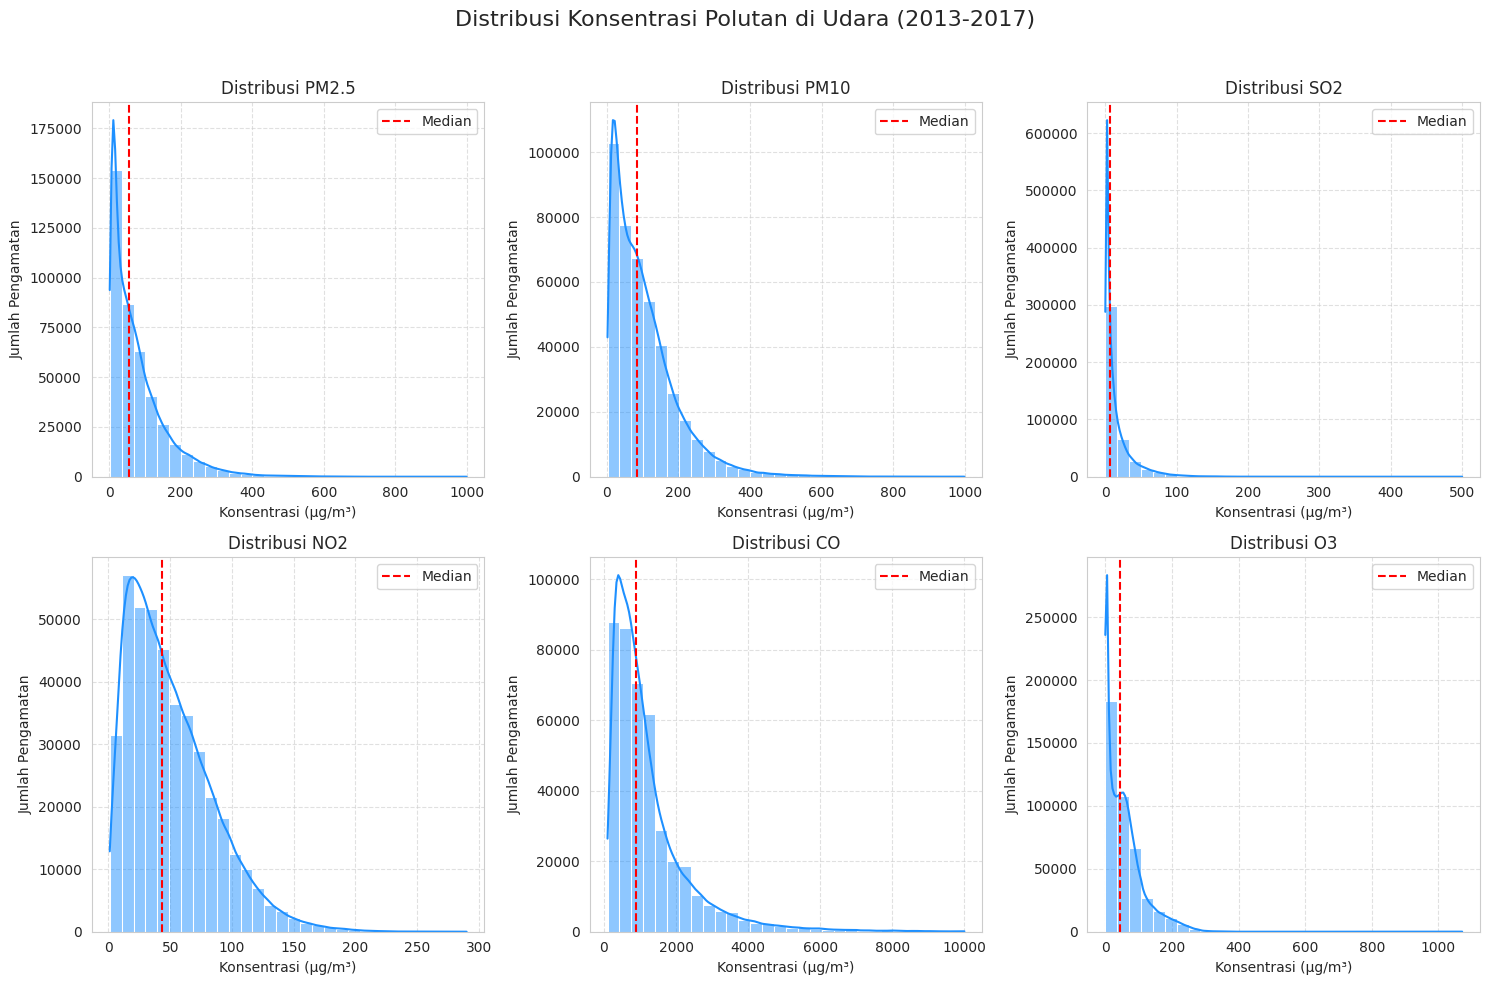

In [141]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Konsentrasi Polutan di Udara (2013-2017)", fontsize=16)

for ax, pollutant in zip(axes.flatten(), pollutants):
    sns.histplot(air_quality[pollutant], bins=30, kde=True, ax=ax, color="dodgerblue")
    ax.axvline(air_quality[pollutant].median(), color="red", linestyle="--", label="Median")
    ax.set_title(f"Distribusi {pollutant}", fontsize=12)
    ax.set_xlabel("Konsentrasi (µg/m³)")
    ax.set_ylabel("Jumlah Pengamatan")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight:**
- Semua polutan memiliki distribusi right-skewed yang artinya mayoritas data berada di nilai kecil namun ada beberapa nilai yang sangat besar
- PM2.5 dan PM10 mayoritas datanya dibawah 50 mikrogram/meter^3, tetapi beberapa kasus mencapai 250-350 mikrogram/meter^3
- Kebanyakan data dari SO2 dan NO2 mendekati nol, tetapi ada lonjakan di beberapa waktu tertentu
- Pola pada O3 mirip dengan NO2 namun rentannya lebih kecil
- CO memiliki outlier ekstrem di atas 5000 mikrogram/meter^3

###Explore tingkat polusi berdasarkan tahun, bulan, hari, dan jam di tiap kota

In [142]:
yearly_avg = air_quality.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
yearly_avg = yearly_avg.reset_index()
display(yearly_avg)

,year,station,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,Aotizhongxin,82.39,112.91,23.76,63.43,1191.39,48.08
1,2013,Changping,72.71,91.23,19.19,41.07,1042.56,61.28
2,2013,Dingling,64.75,78.72,14.02,30.11,819.52,64.73
3,2013,Dongsi,86.94,104.78,23.73,57.56,1412.86,63.79
4,2013,Guanyuan,82.04,107.74,21.80,58.13,1231.46,54.98
5,2013,Gucheng,82.08,112.57,17.55,61.49,1350.62,56.02
6,2013,Huairou,68.83,95.82,17.15,35.99,1004.27,61.88
7,2013,Nongzhanguan,84.41,103.82,23.24,59.57,1329.81,56.11
8,2013,Shunyi,77.18,94.58,15.20,41.64,1208.99,56.31
9,2013,Tiantan,83.21,108.26,18.19,53.26,1328.22,54.19


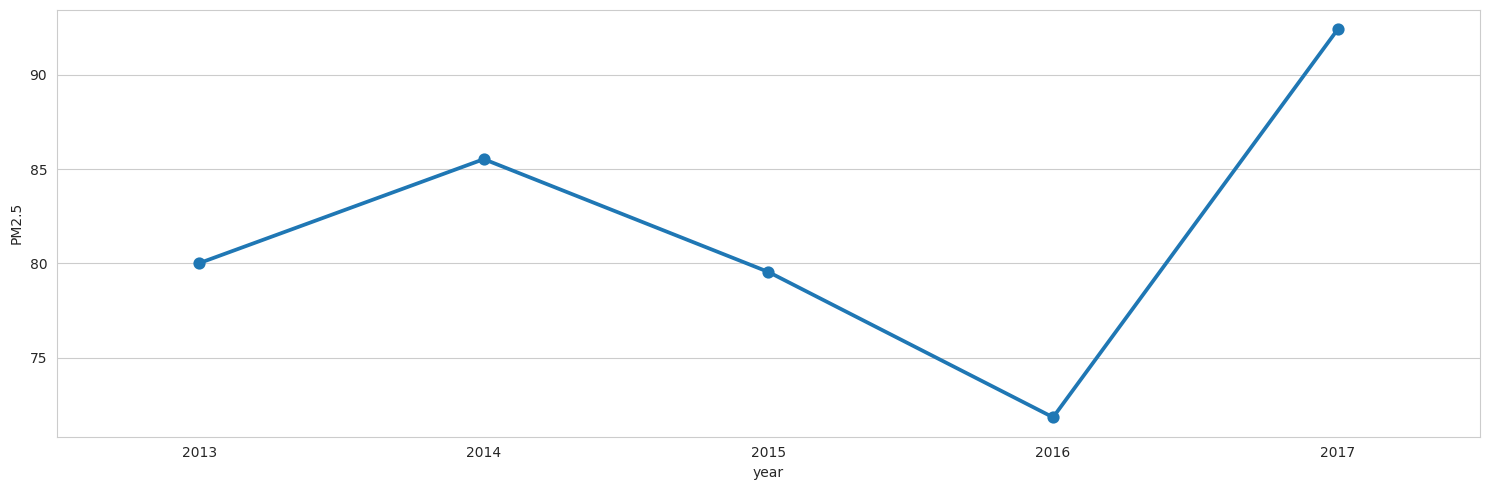

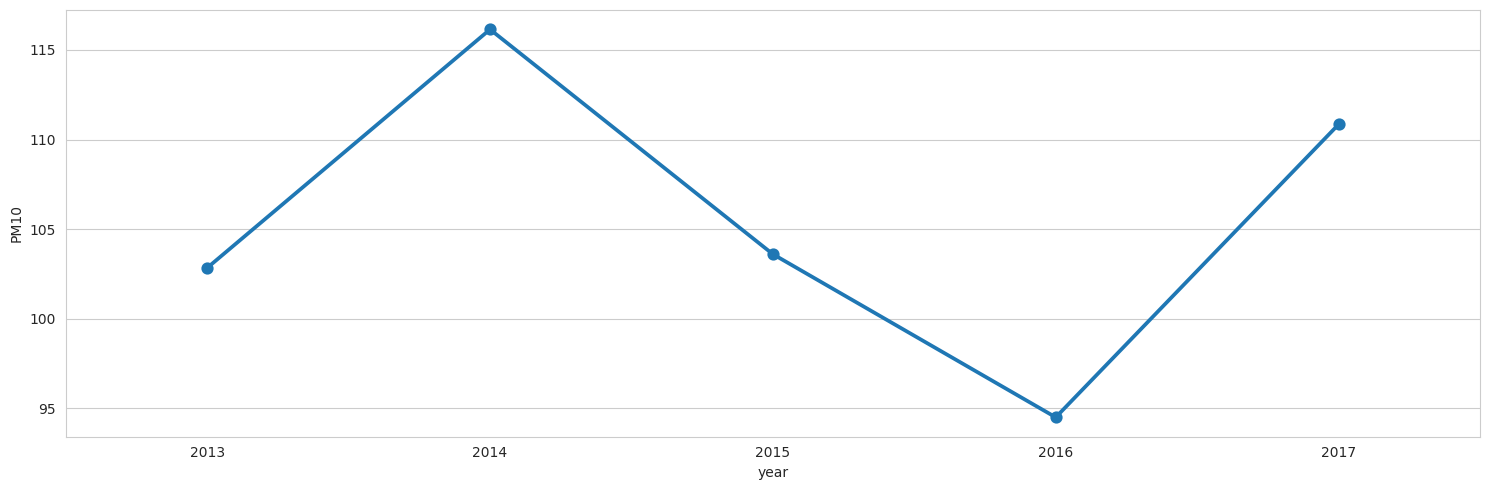

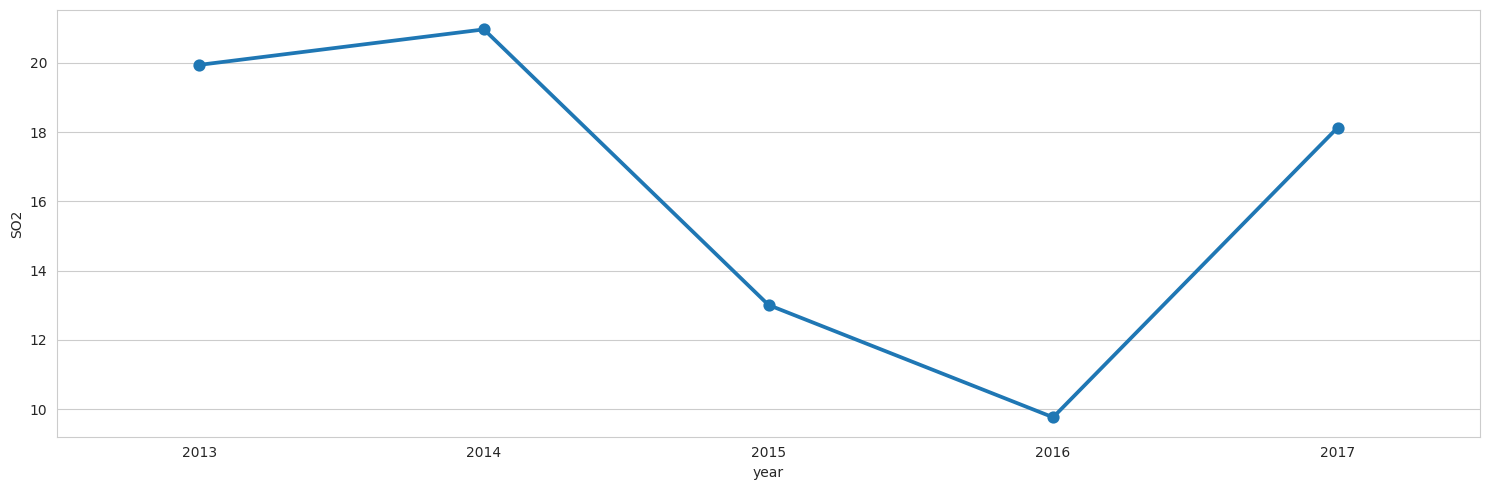

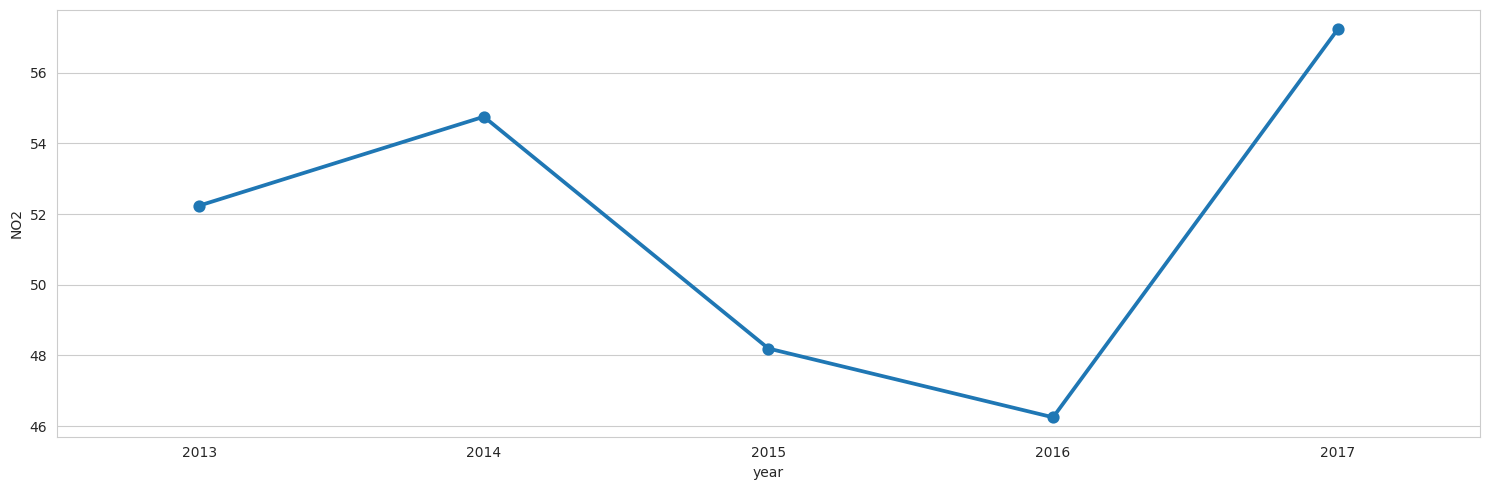

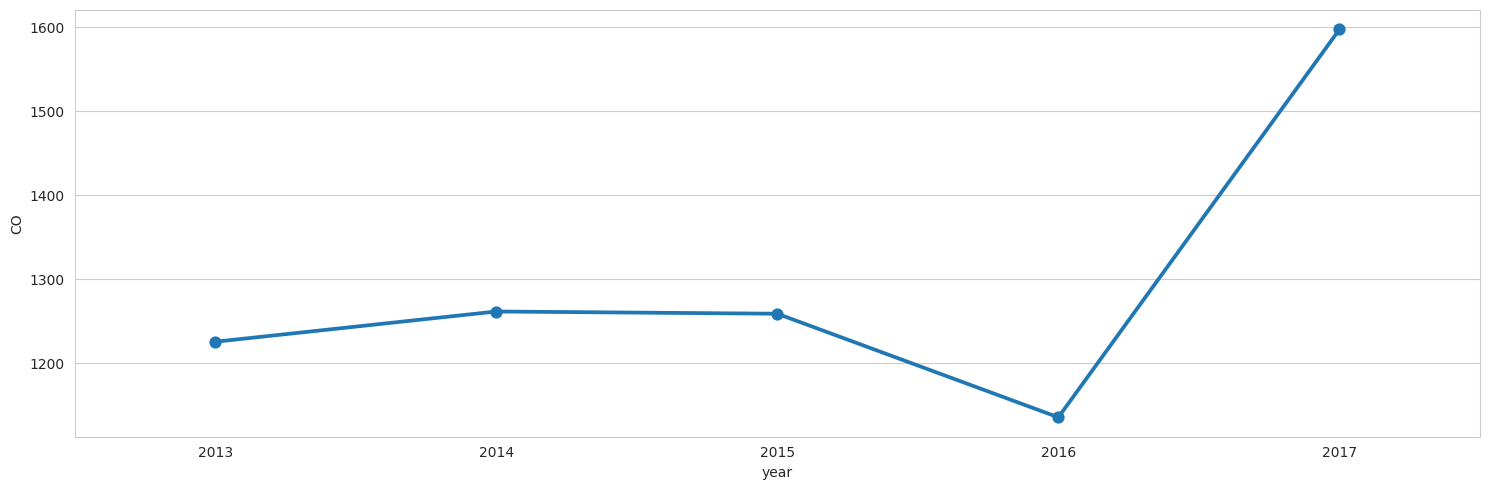

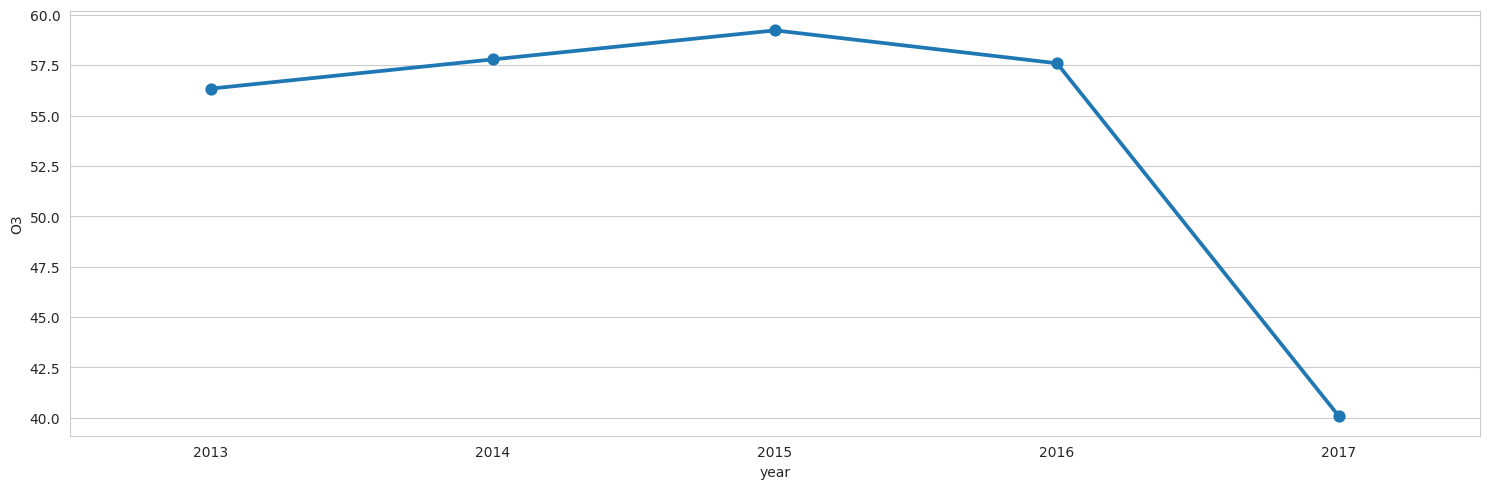

In [143]:
polutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for i in polutant:
    yearly = air_quality[[i, 'year']].groupby(['year']).mean().reset_index().sort_values(by=['year'], ascending=False)

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=yearly, ax=ax)
    plt.tight_layout()
    plt.show()

In [144]:
monthly_avg = air_quality.groupby(['month', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
monthly_avg = monthly_avg.reset_index()
display(monthly_avg)

,month,station,PM2.5,PM10,SO2,NO2,CO,O3
0,1,Aotizhongxin,92.70,113.84,34.92,66.00,1959.71,27.08
1,1,Changping,84.13,104.72,32.26,57.59,1867.77,27.44
2,1,Dingling,73.10,89.00,23.33,39.41,1346.36,39.54
3,1,Dongsi,100.49,118.51,33.46,60.86,1815.97,27.60
4,1,Guanyuan,93.72,116.02,34.88,70.11,1814.24,25.08
...,...,...,...,...,...,...,...,...
139,12,Nongzhanguan,117.86,140.43,30.64,77.18,2381.23,22.19
140,12,Shunyi,96.49,112.19,21.78,57.26,2031.04,23.12
141,12,Tiantan,114.41,139.04,19.31,73.33,2281.81,18.47
142,12,Wanliu,110.78,132.29,29.37,76.84,2467.19,15.55


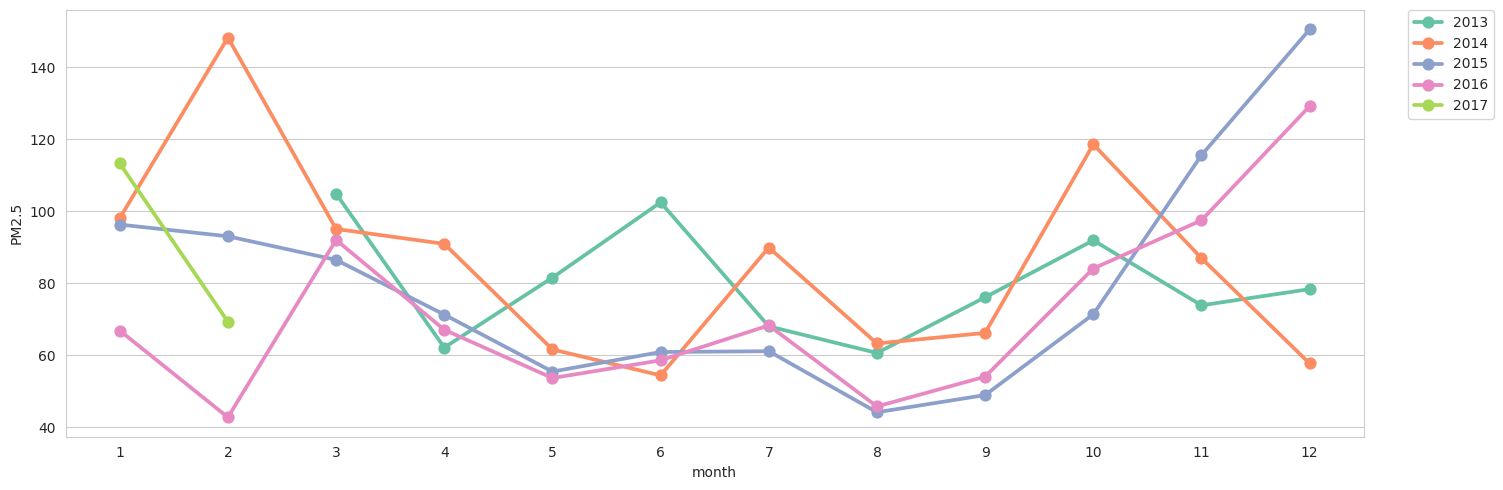

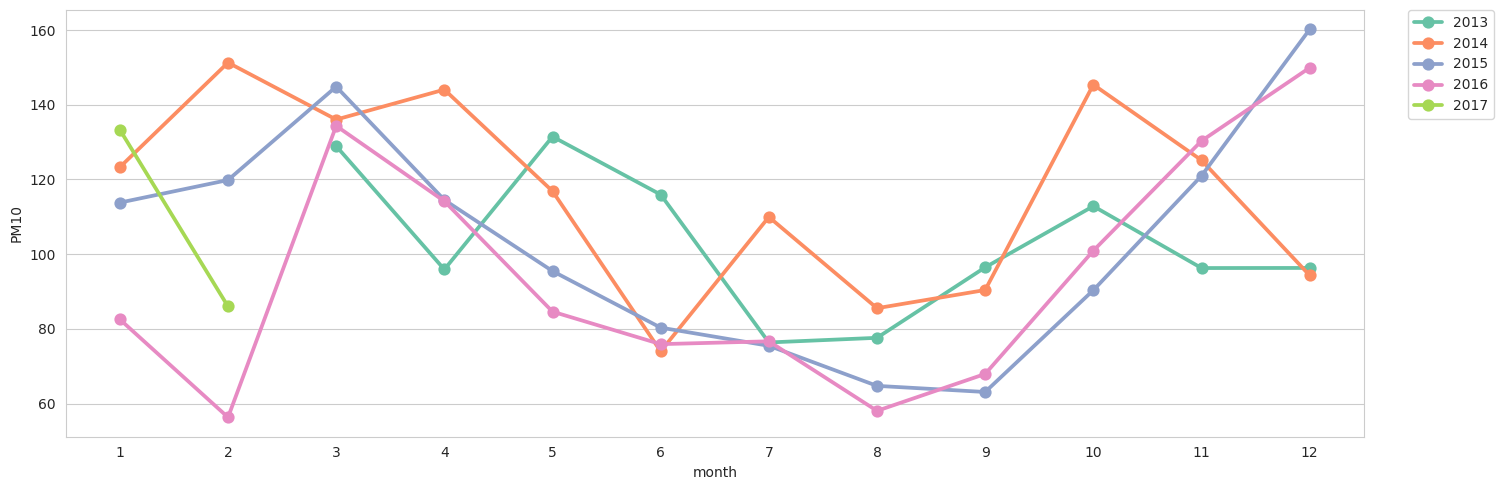

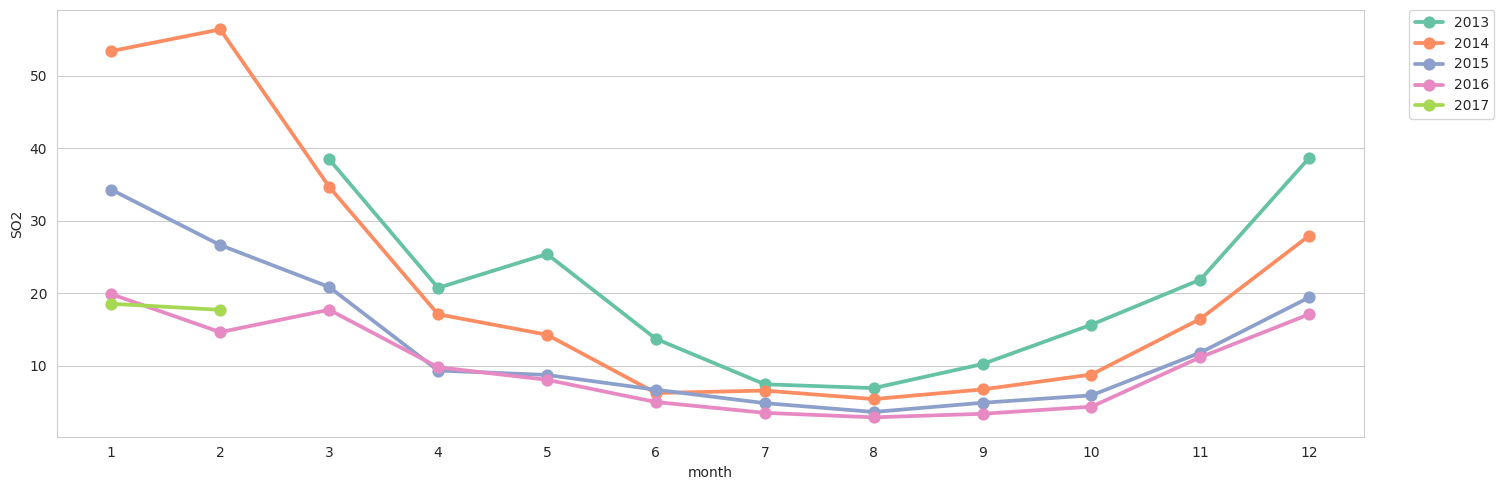

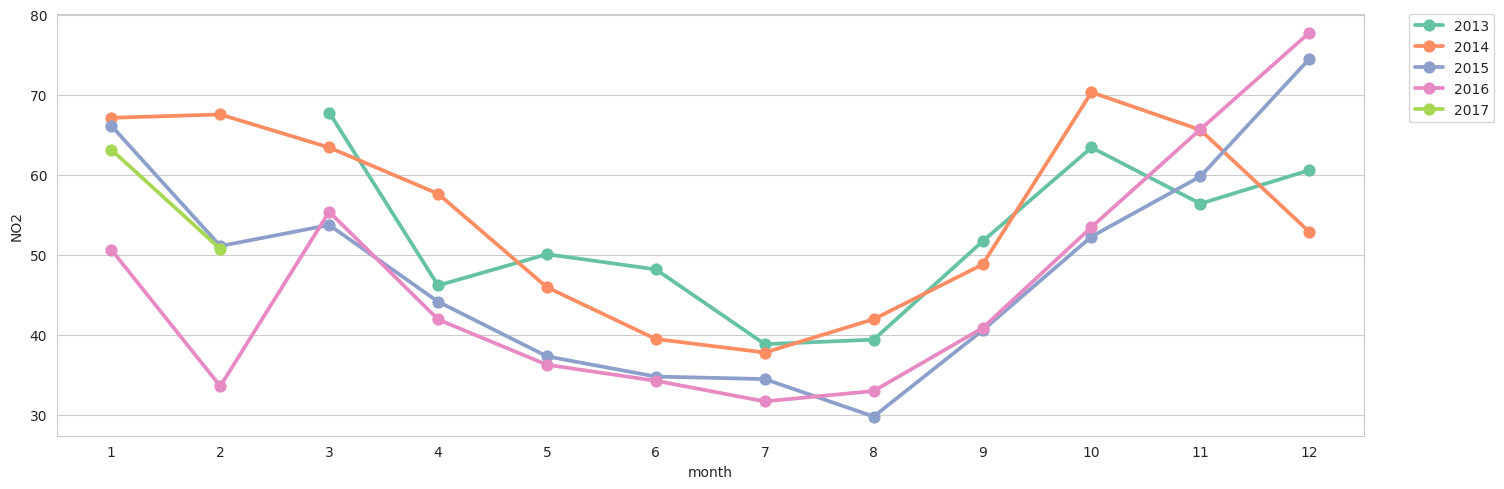

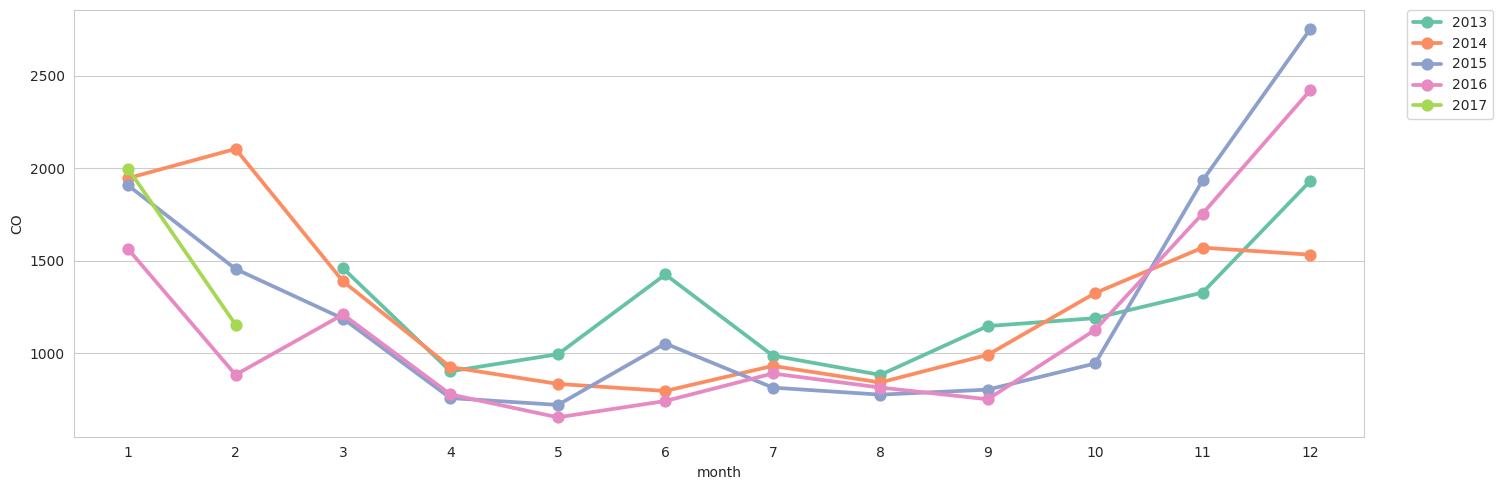

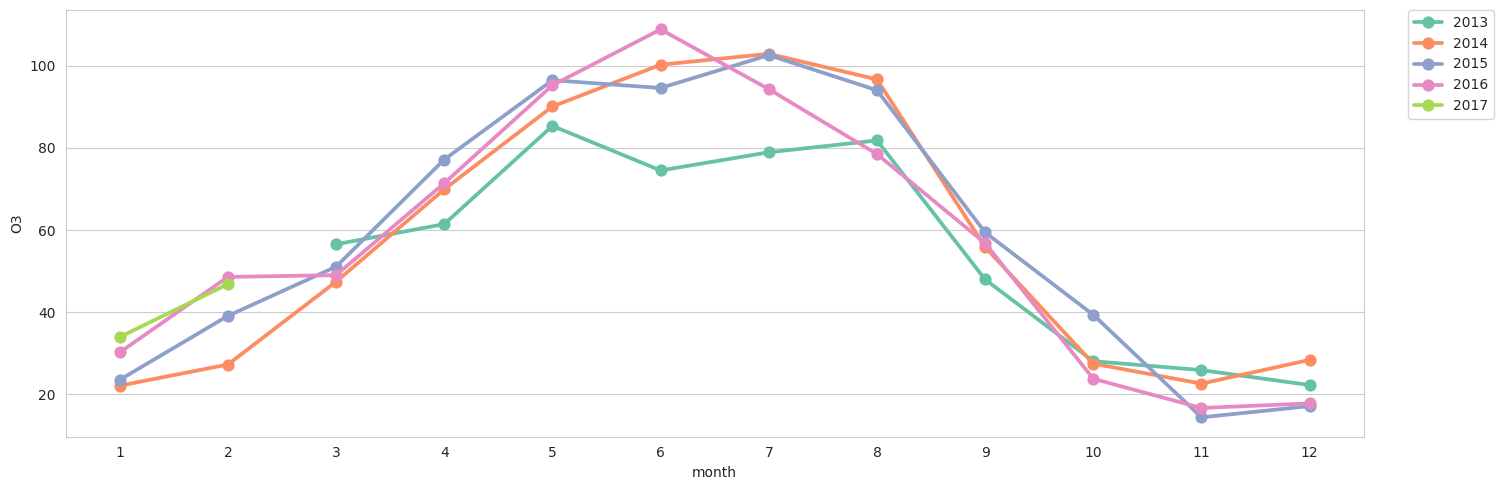

In [145]:
polutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for i in polutant:
    monthly = air_quality[[i, 'month', 'year']].groupby(['month', 'year']).mean().reset_index().sort_values(by=['month', 'year'], ascending=False)

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='month', y=i, data=monthly, hue='year', ax=ax, palette='Set2')
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), borderaxespad=0)
    plt.tight_layout()
    plt.show()

In [146]:
import calendar

air_quality['Date'] = pd.to_datetime(air_quality[['year', 'month', 'day']])
air_quality.tail()

def findDay(date):
    nameday = calendar.day_name[date.weekday()]
    return nameday

air_quality['nameday'] = air_quality['Date'].apply(lambda x: findDay(x))
air_quality.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,nameday
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,Friday
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,Friday
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,Friday
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,Friday
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,Friday


In [147]:
daily_avg = air_quality.groupby(['nameday', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
daily_avg = daily_avg.reset_index()
display(daily_avg)

,nameday,station,PM2.5,PM10,SO2,NO2,CO,O3
0,Friday,Aotizhongxin,85.31,111.76,17.58,60.92,1283.08,53.72
1,Friday,Changping,73.33,95.07,15.10,44.87,1165.73,56.50
2,Friday,Dingling,68.26,85.56,11.91,28.04,916.47,67.17
3,Friday,Dongsi,91.01,113.57,19.08,55.46,1389.87,57.79
4,Friday,Guanyuan,87.31,111.94,17.72,59.91,1323.41,53.65
...,...,...,...,...,...,...,...,...
79,Wednesday,Nongzhanguan,82.74,105.60,17.52,58.14,1306.23,57.09
80,Wednesday,Shunyi,78.16,96.31,12.55,44.11,1152.34,54.60
81,Wednesday,Tiantan,79.96,102.65,13.39,54.04,1296.59,54.97
82,Wednesday,Wanliu,81.80,107.46,17.19,65.83,1318.41,46.17


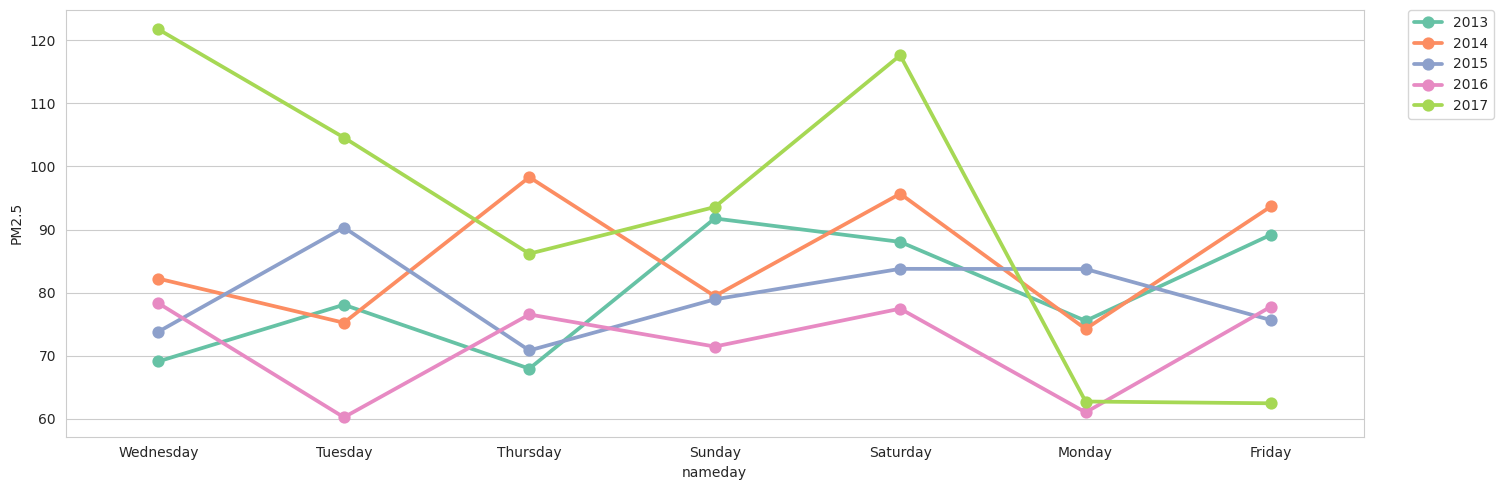

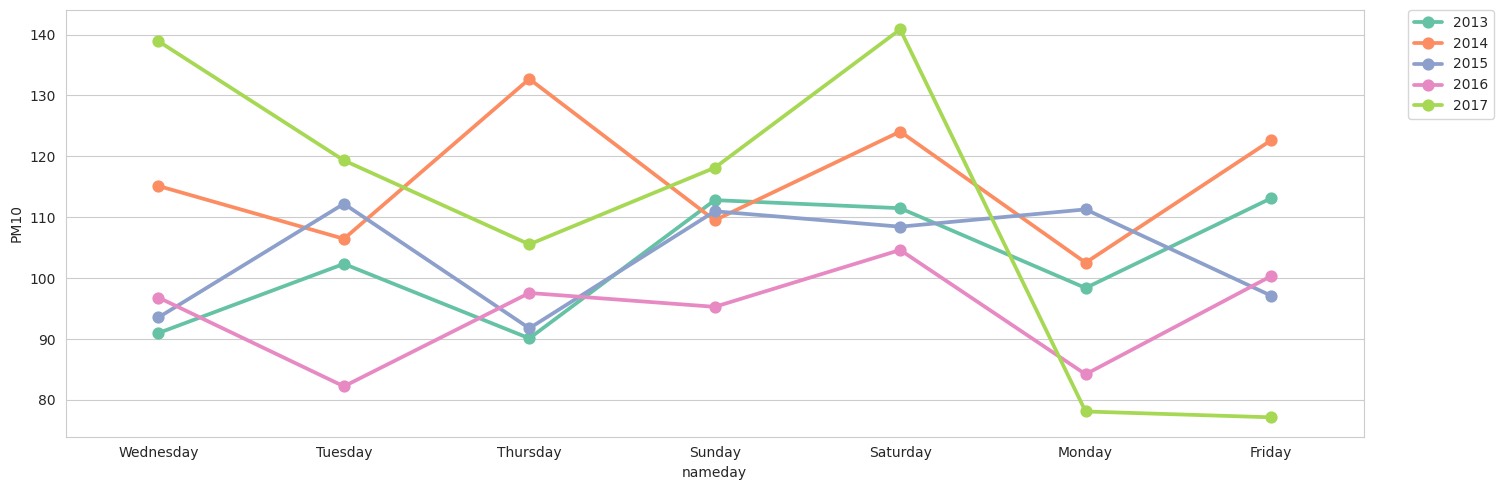

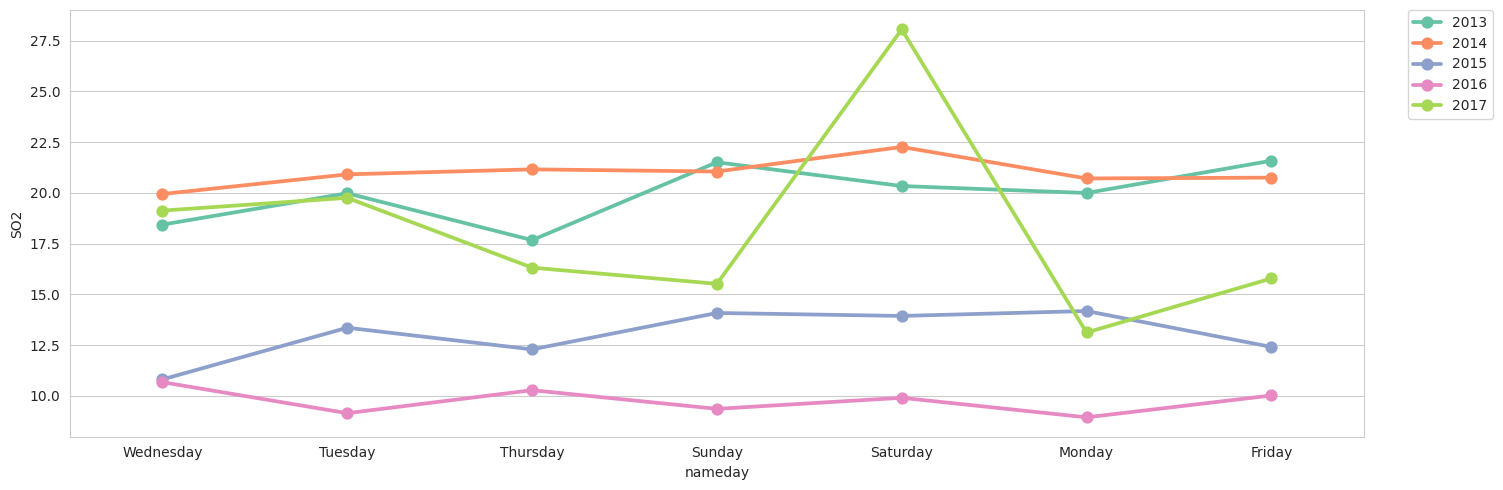

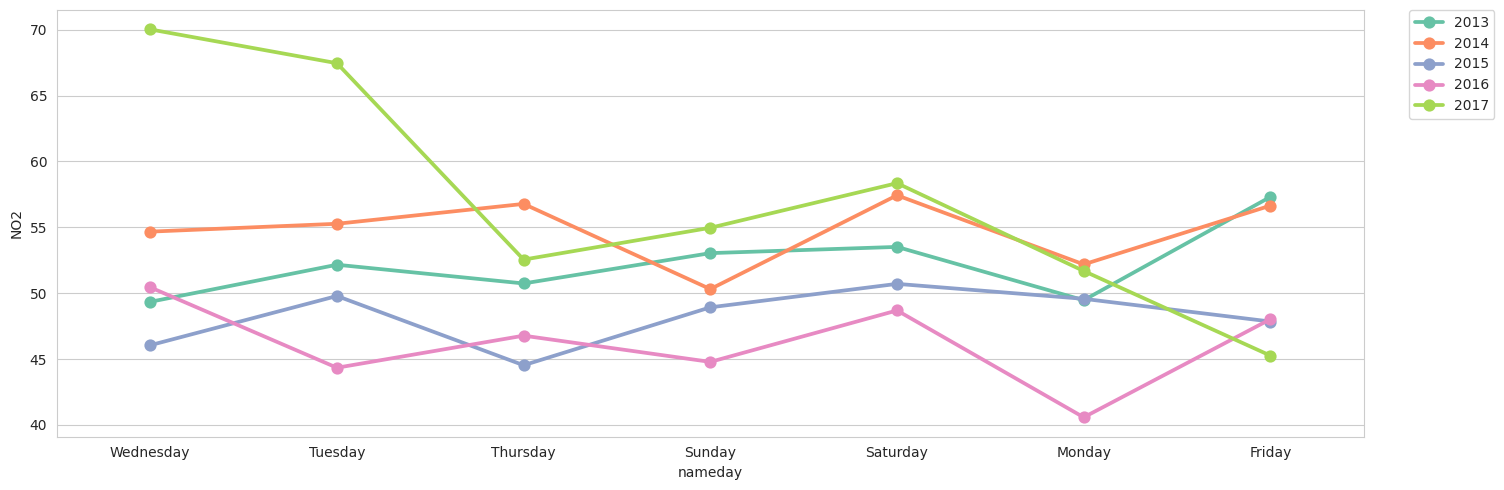

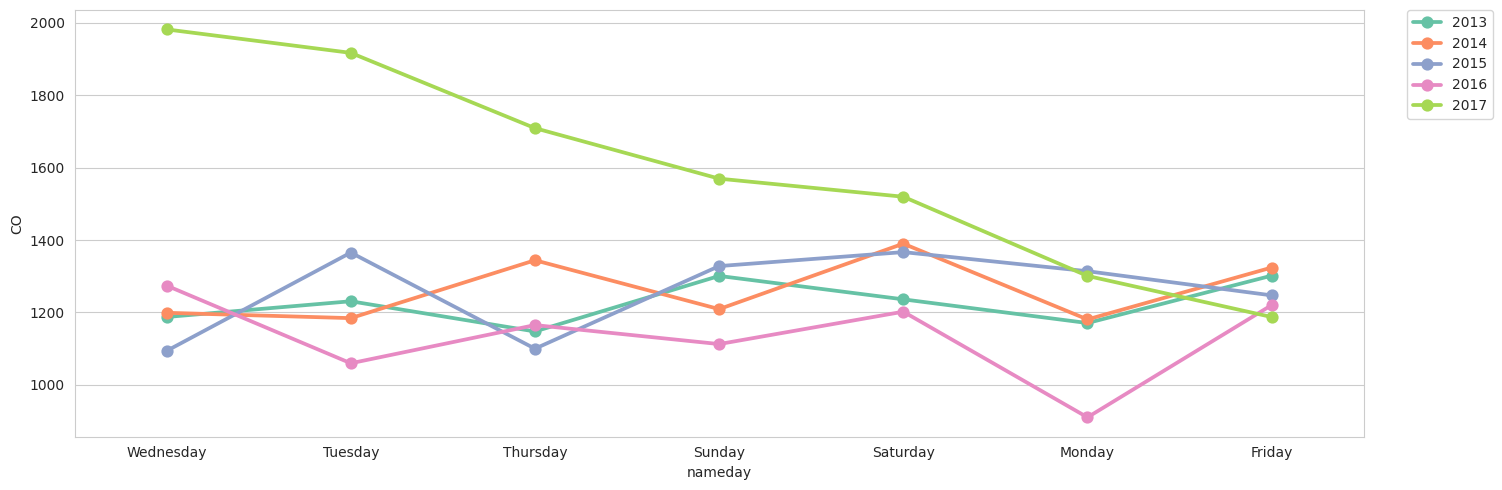

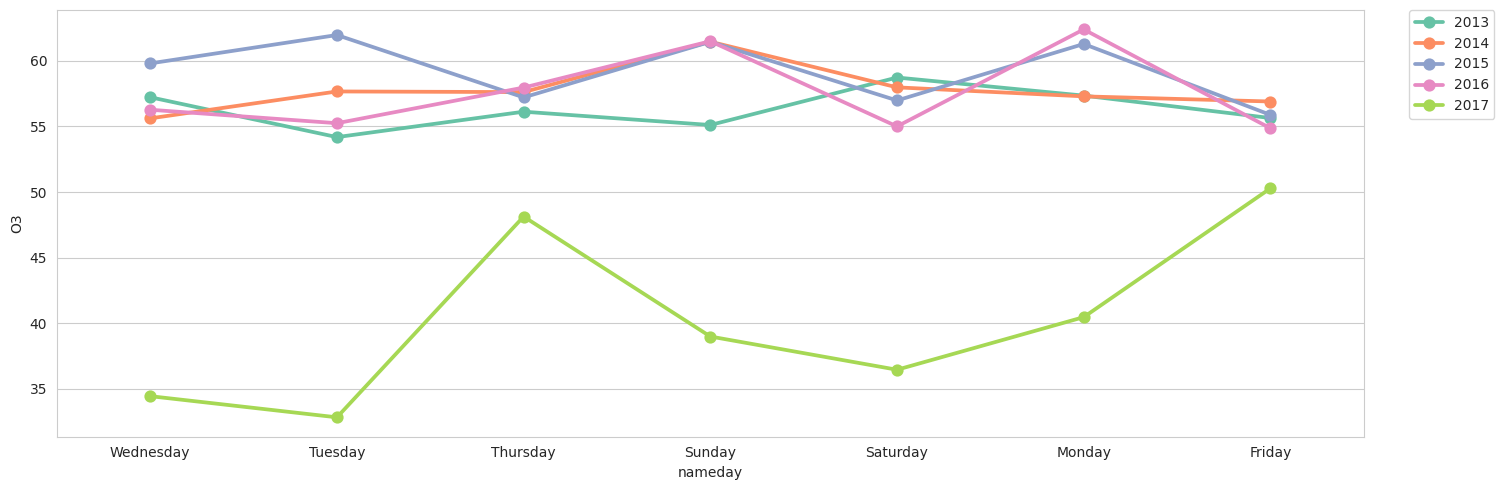

In [148]:
polutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for i in polutant:
    daily = air_quality[[i, 'nameday', 'year']].groupby(['nameday', 'year']).mean().reset_index().sort_values(by=['nameday', 'year'], ascending=False)

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='nameday', y=i, data=daily, hue='year', ax=ax, palette='Set2')
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), borderaxespad=0)
    plt.tight_layout()
    plt.show()

In [149]:
hourly_avg = air_quality.groupby(['station', 'hour'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
hourly_avg = hourly_avg.reset_index()
display(hourly_avg)

,station,hour,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,0,91.95,124.73,18.38,71.82,1450.05,38.33
1,Aotizhongxin,1,91.90,123.96,18.59,70.70,1473.03,34.31
2,Aotizhongxin,2,91.48,120.36,17.59,67.03,1451.92,31.02
3,Aotizhongxin,3,88.57,114.59,16.61,65.06,1359.19,28.64
4,Aotizhongxin,4,85.18,109.07,15.66,64.38,1323.61,26.93
...,...,...,...,...,...,...,...,...
283,Wanshouxigong,19,87.33,126.26,16.23,57.37,1328.39,77.34
284,Wanshouxigong,20,92.47,133.05,16.30,62.99,1426.90,64.55
285,Wanshouxigong,21,95.67,134.77,16.36,66.55,1506.63,53.10
286,Wanshouxigong,22,95.46,131.11,16.67,67.25,1534.44,46.29


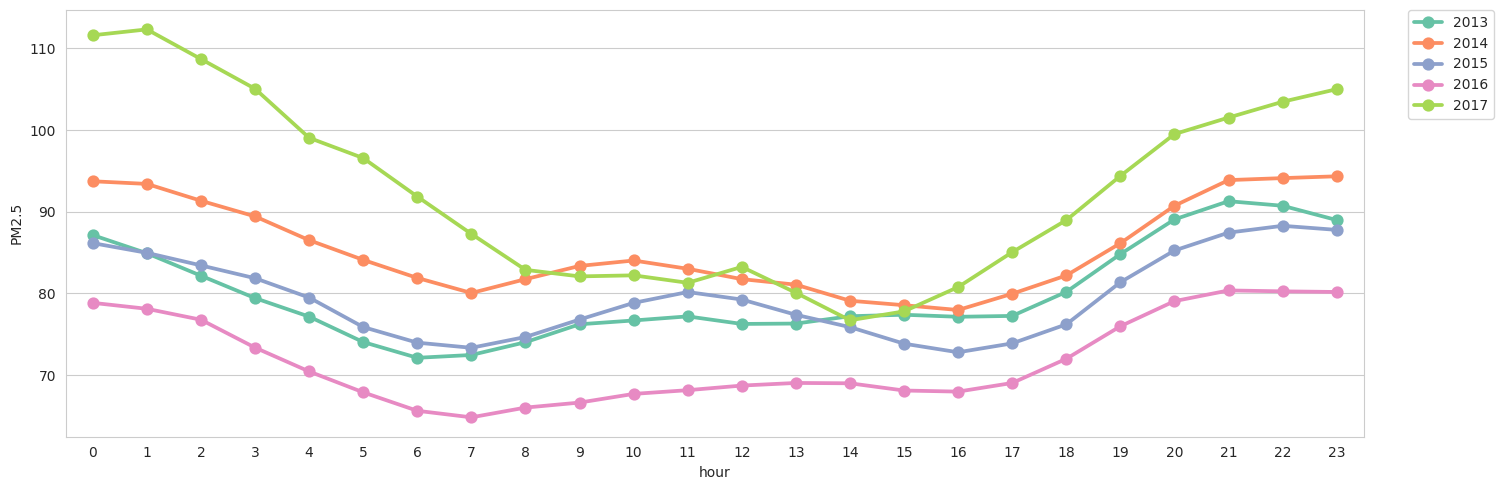

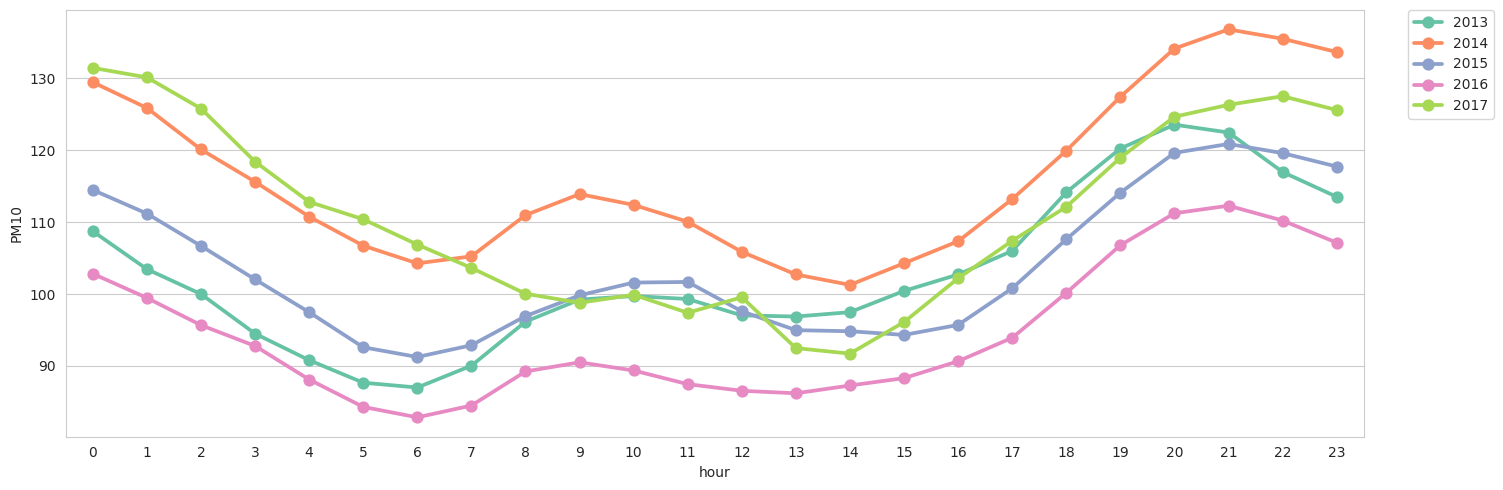

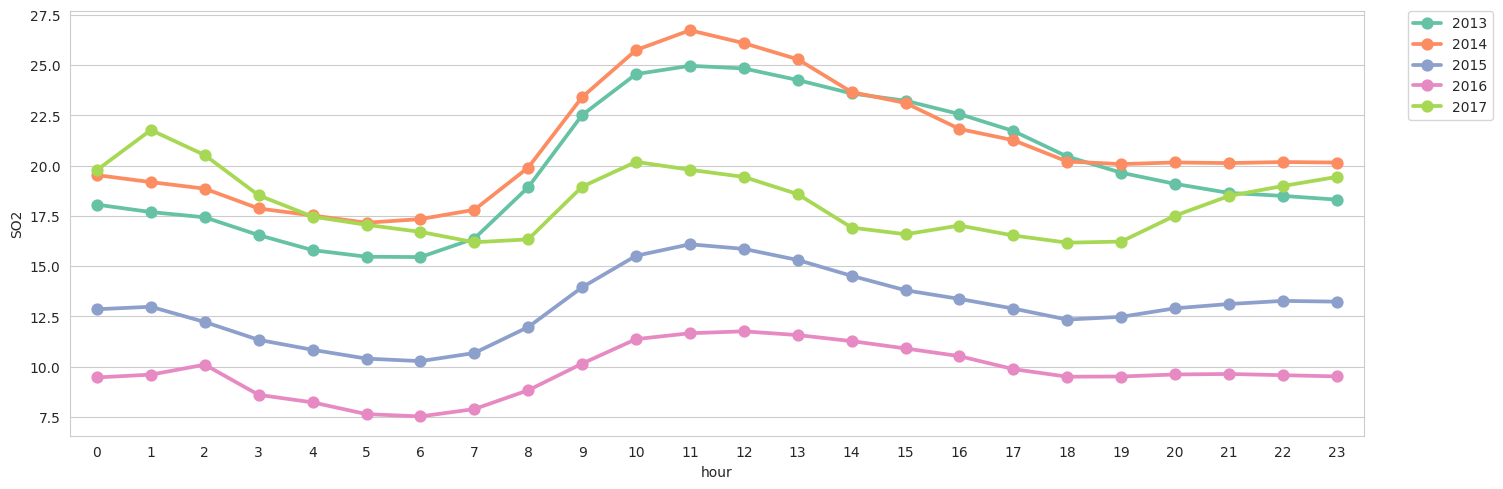

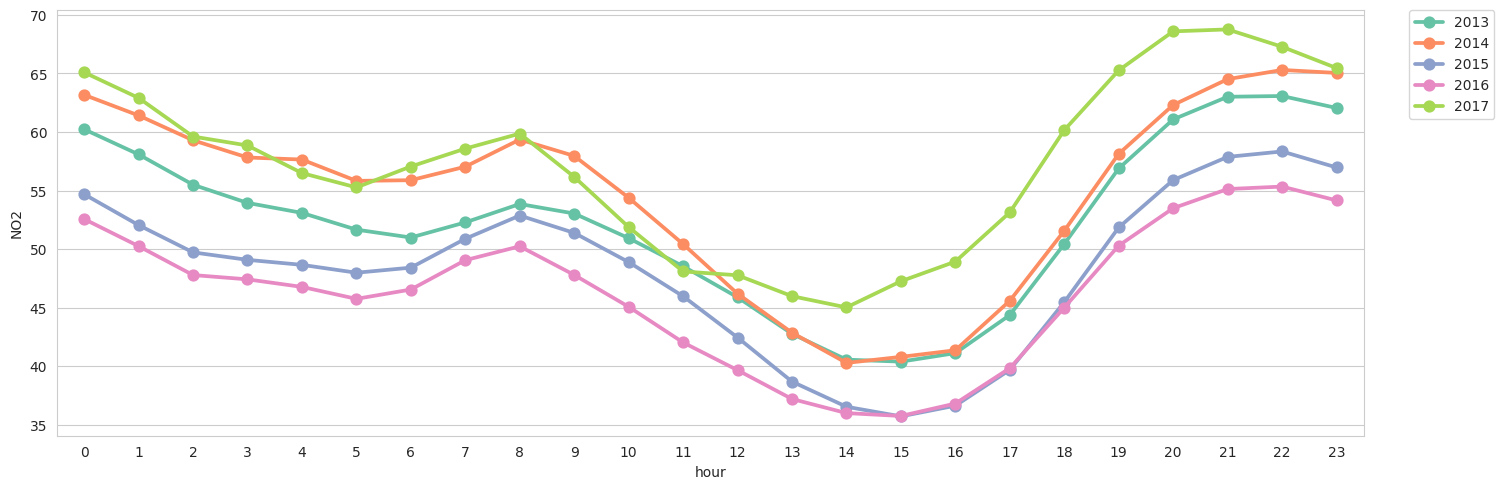

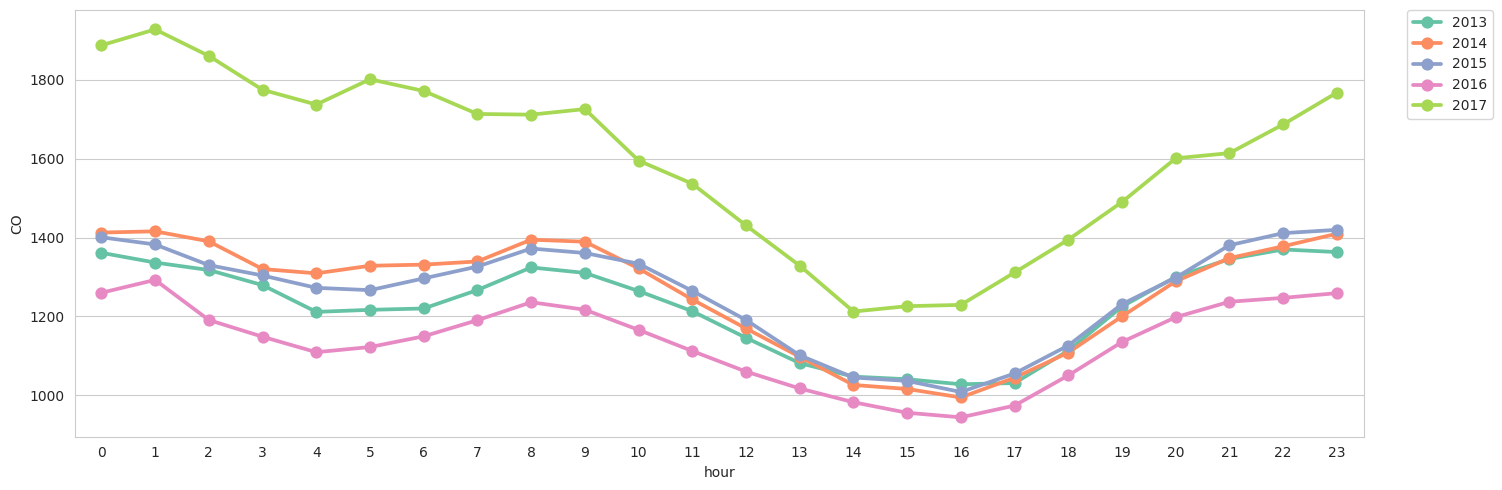

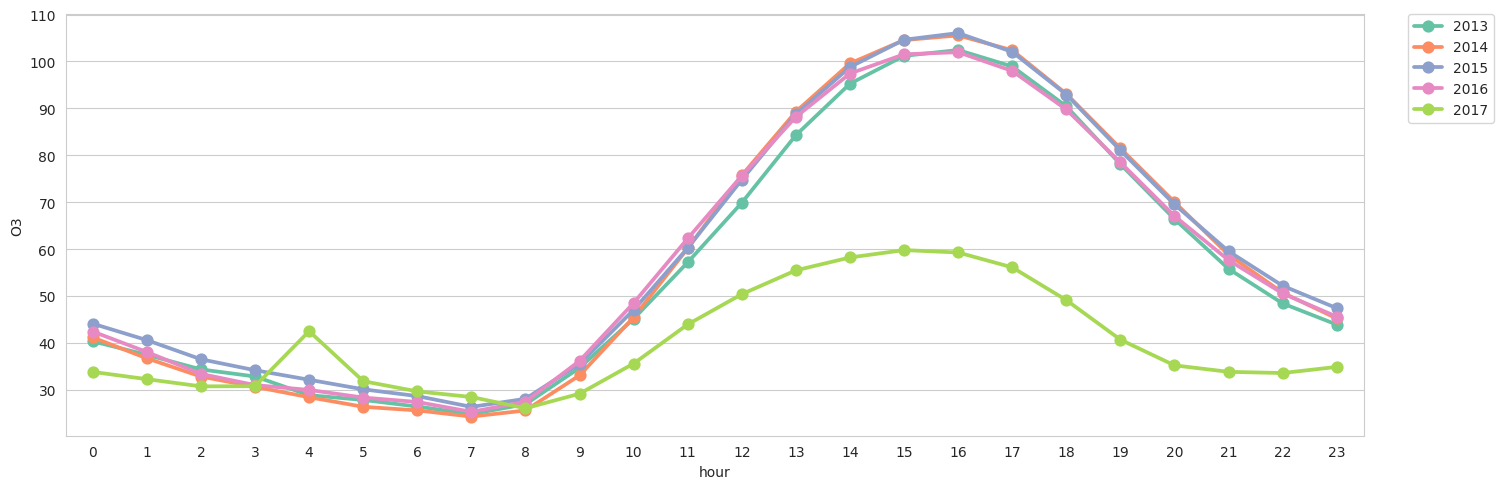

In [150]:
polutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for i in polutant:
    hourly = air_quality[[i, 'hour', 'year']].groupby(['hour', 'year']).mean().reset_index().sort_values(by=['hour', 'year'], ascending=False)

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(x='hour', y=i, data=hourly, hue='year', ax=ax, palette='Set2')
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, bbox_to_anchor=(1.1, 1), borderaxespad=0)
    plt.tight_layout()
    plt.show()

###Explore Air Quality index (AQI) pada polutan

In [151]:
def get_aqi(pollutant, concentration):
    if pollutant == "PM2.5":
        if concentration <= 12: return 0 + (50/12) * concentration
        elif concentration <= 35.4: return 50 + (50/23.4) * (concentration - 12.1)
        elif concentration <= 55.4: return 100 + (50/20) * (concentration - 35.5)
        elif concentration <= 150.4: return 150 + (50/95) * (concentration - 55.5)
        elif concentration <= 250.4: return 200 + (100/100) * (concentration - 150.5)
        elif concentration <= 500: return 300 + (200/249.6) * (concentration - 250.5)

    elif pollutant == "PM10":
        if concentration <= 54: return 0 + (50/54) * concentration
        elif concentration <= 154: return 50 + (50/100) * (concentration - 55)
        elif concentration <= 254: return 100 + (50/100) * (concentration - 155)
        elif concentration <= 354: return 150 + (50/100) * (concentration - 255)
        elif concentration <= 424: return 200 + (100/70) * (concentration - 355)
        elif concentration <= 604: return 300 + (200/180) * (concentration - 425)

    elif pollutant == "CO":
        if concentration <= 4.4: return 0 + (50/4.4) * concentration
        elif concentration <= 9.4: return 50 + (50/5) * (concentration - 4.5)
        elif concentration <= 12.4: return 100 + (50/3) * (concentration - 9.5)
        elif concentration <= 15.4: return 150 + (50/3) * (concentration - 12.5)
        elif concentration <= 30.4: return 200 + (100/15) * (concentration - 15.5)
        elif concentration <= 50.4: return 300 + (200/20) * (concentration - 30.5)

    elif pollutant == "NO2":
        if concentration <= 53: return 0 + (50/53) * concentration
        elif concentration <= 100: return 50 + (50/47) * (concentration - 54)
        elif concentration <= 360: return 100 + (50/260) * (concentration - 101)
        elif concentration <= 649: return 150 + (50/289) * (concentration - 361)
        elif concentration <= 1249: return 200 + (100/600) * (concentration - 650)
        elif concentration <= 2049: return 300 + (200/800) * (concentration - 1250)

    elif pollutant == "O3":
        if concentration <= 54: return 0 + (50/54) * concentration
        elif concentration <= 70: return 50 + (50/16) * (concentration - 55)
        elif concentration <= 85: return 100 + (50/15) * (concentration - 71)
        elif concentration <= 105: return 150 + (50/20) * (concentration - 86)
        elif concentration <= 200: return 200 + (100/95) * (concentration - 106)
        elif concentration <= 405: return 300 + (200/205) * (concentration - 201)

    elif pollutant == "SO2":
        if concentration <= 35: return 0 + (50/35) * concentration
        elif concentration <= 75: return 50 + (50/40) * (concentration - 36)
        elif concentration <= 185: return 100 + (50/110) * (concentration - 76)
        elif concentration <= 304: return 150 + (50/119) * (concentration - 186)
        elif concentration <= 604: return 200 + (100/300) * (concentration - 305)
        elif concentration <= 1004: return 300 + (200/400) * (concentration - 605)

    return np.nan


def categorize_aqi(aqi):
    if aqi <= 100:
      return "Good"
    elif aqi <= 200:
      return "Moderate"
    elif aqi <= 300:
      return "Unhealthy for Sensitive Groups"
    elif aqi <= 400:
      return "Unhealthy"
    else:
      return "Hazardous"

pollutants = ["PM2.5", "PM10", "CO", "NO2", "O3", "SO2"]
for pollutant in pollutants:
    air_quality[f"AQI_{pollutant}"] = air_quality[pollutant].apply(lambda x: get_aqi(pollutant, x))

air_quality['AQI'] = air_quality[[f"AQI_{p}" for p in pollutants]].max(axis=1)

air_quality['Category_AQI'] = air_quality['AQI'].apply(categorize_aqi)

print(air_quality[['AQI', 'Category_AQI']])

               AQI Category_AQI
0       120.000000     Moderate
1       120.000000     Moderate
2       106.666667     Moderate
3       103.333333     Moderate
4       103.333333     Moderate
...            ...          ...
420763  103.333333     Moderate
420764   51.923077         Good
420765   54.059829         Good
420766   62.500000         Good
420767   51.923077         Good

[420768 rows x 2 columns]


##Explore station dan tingkat polusi udara

In [153]:
station_pollution = air_quality.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].agg(['mean', 'median', 'max', 'min']).T
display(station_pollution)

station       Aotizhongxin     Changping      Dingling        Dongsi  \
PM2.5 mean       82.454091     71.061705     66.126420     86.063363   
      median     59.000000     47.000000     42.000000     62.000000   
      max       898.000000    882.000000    881.000000    737.000000   
      min         3.000000      2.000000      3.000000      3.000000   
PM10  mean      110.023734     94.589089     83.810825    110.142778   
      median     87.000000     72.120000     61.000000     86.000000   
      max       984.000000    999.000000    905.000000    955.000000   
      min         2.000000      2.000000      2.000000      2.000000   
SO2   mean       17.482383     14.918742     11.767418     18.451444   
      median      9.000000      7.000000      5.000000     10.000000   
      max       341.000000    310.000000    156.000000    300.000000   
      min         0.285600      0.285600      0.285600      0.285600   
NO2   mean       59.247512     44.146451     27.692968     53.657559   
      median     54.000000     36.543400     19.000000     47.000000   
      max       290.000000    226.000000    205.000000    258.000000   
      min         2.000000      1.847700      1.026500      2.000000   
CO    mean     1265.954755   1150.682899    898.724532   1345.100583   
      median    900.000000    800.000000    600.000000   1050.000000   
      max     10000.000000  10000.000000  10000.000000  10000.000000   
      min       100.000000    100.000000    100.000000    100.000000   
O3    mean       55.450894     58.006110     68.738273     57.470922   
      median     40.933333     46.000000     61.047000     45.000000   
      max       423.000000    429.000000    500.000000   1071.000000   
      min         0.214200      0.214200      0.214200      0.642600   

station           Guanyuan       Gucheng       Huairou  Nongzhanguan  \
PM2.5 mean       82.912106     83.903958     69.540036     84.873507   
      median     60.000000     61.000000     48.000000     60.000000   
      max       680.000000    770.000000    762.000000    844.000000   
      min         2.000000      2.000000      2.000000      2.000000   
PM10  mean      108.984715    118.948966     91.641282    109.093026   
      median     89.000000    100.000000     70.000000     86.000000   
      max       999.000000    994.000000    993.000000    995.000000   
      min         2.000000      2.000000      2.000000      2.000000   
SO2   mean       17.591275     15.384377     12.175362     18.691928   
      median      8.000000      7.000000      4.000000      9.000000   
      max       293.000000    500.000000    315.000000    257.000000   
      min         1.000000      0.285600      0.285600      0.571200   
NO2   mean       57.934782     55.864178     32.321274     58.088518   
      median     51.000000     50.000000     25.000000     51.000000   
      max       270.000000    276.000000    231.000000    273.000000   
      min         2.000000      2.000000      1.026500      2.000000   
CO    mean     1278.333164   1337.243492   1022.151955   1328.966556   
      median    927.227273   1000.000000    800.000000   1000.000000   
      max     10000.000000  10000.000000  10000.000000  10000.000000   
      min       100.000000    100.000000    100.000000    100.000000   
O3    mean       55.070416     57.647866     60.260029     58.454709   
      median     40.000000     44.000000     50.000000     44.125200   
      max       415.000000    450.000000    444.000000    390.000000   
      min         0.214200      0.214200      0.214200      0.214200   

station             Shunyi       Tiantan        Wanliu  Wanshouxigong  
PM2.5 mean       79.361823     82.116930     83.346523      84.987862  
      median     56.000000     59.000000     59.000000      61.000000  
      max       941.000000    821.000000    957.000000     999.000000  
      min         2.000000      3.000000      2.000000       3.000000  
PM10  mean       98.637740    106.4085

###Explore korelasi antara polutan dan faktor cuaca

In [154]:
corr_matrix = air_quality[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'WSPM', 'RAIN']].corr()
corr_table = corr_matrix.reset_index().rename(columns={'index': 'variabel'})
display(corr_table)

,variabel,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN
0,PM2.5,1.000000,0.879300,0.478301,0.659130,0.768896,-0.151431,-0.132065,0.020969,-0.269687,-0.014503
1,PM10,0.879300,1.000000,0.458791,0.645981,0.685239,-0.113030,-0.097182,-0.015983,-0.181619,-0.026718
2,SO2,0.478301,0.458791,1.000000,0.493196,0.529203,-0.167868,-0.325305,0.227485,-0.106482,-0.040457
3,NO2,0.659130,0.645981,0.493196,1.000000,0.690565,-0.471191,-0.280735,0.179585,-0.393998,-0.043951
4,CO,0.768896,0.685239,0.529203,0.690565,1.000000,-0.313041,-0.330868,0.194204,-0.290057,-0.013657
5,O3,-0.151431,-0.113030,-0.167868,-0.471191,-0.313041,1.000000,0.596453,-0.448674,0.296441,0.023806
6,TEMP,-0.132065,-0.097182,-0.325305,-0.280735,-0.330868,0.596453,1.000000,-0.813312,0.032601,0.037647
7,PRES,0.020969,-0.015983,0.227485,0.179585,0.194204,-0.448674,-0.813312,1.000000,0.065400,-0.060952
8,WSPM,-0.269687,-0.181619,-0.106482,-0.393998,-0.290057,0.296441,0.032601,0.065400,1.000000,0.020975
9,RAIN,-0.014503,-0.026718,-0.040457,-0.043951,-0.013657,0.023806,0.037647,-0.060952,0.020975,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola temporal tingkat polusi udara serta distribusi kualitas udara dari tahun 2013 hingga 2017?

In [155]:
air_quality.describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
year,420768.0,NaN,NaN,NaN,2014.66256,2013.0,2014.0,2015.0,2016.0,2017.0,1.177198
month,420768.0,NaN,NaN,NaN,6.52293,1.0,4.0,7.0,10.0,12.0,3.448707
day,420768.0,NaN,NaN,NaN,15.729637,1.0,8.0,16.0,23.0,31.0,8.800102
hour,420768.0,NaN,NaN,NaN,11.5,0.0,5.75,11.5,17.25,23.0,6.922195
PM2.5,420768.0,NaN,NaN,NaN,79.729027,2.0,21.0,56.0,110.0,999.0,80.088053
PM10,420768.0,NaN,NaN,NaN,104.58404,2.0,36.0,83.0,145.0,999.0,91.17351
SO2,420768.0,NaN,NaN,NaN,15.842407,0.2856,3.0,7.0,20.0,500.0,21.53257
NO2,420768.0,NaN,NaN,NaN,50.558021,1.0265,23.0,43.0,71.0,290.0,34.803321
CO,420768.0,NaN,NaN,NaN,1235.285334,100.0,500.0,900.0,1500.0,10000.0,1139.341459
O3,420768.0,NaN,NaN,NaN,57.082369,0.2142,11.0,44.0,81.526316,1071.0,56.267973


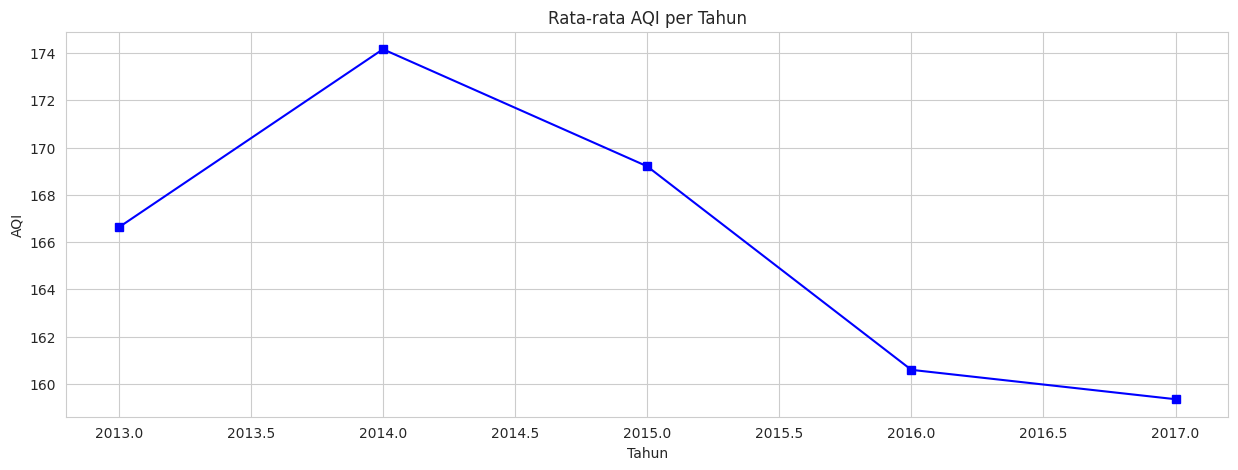

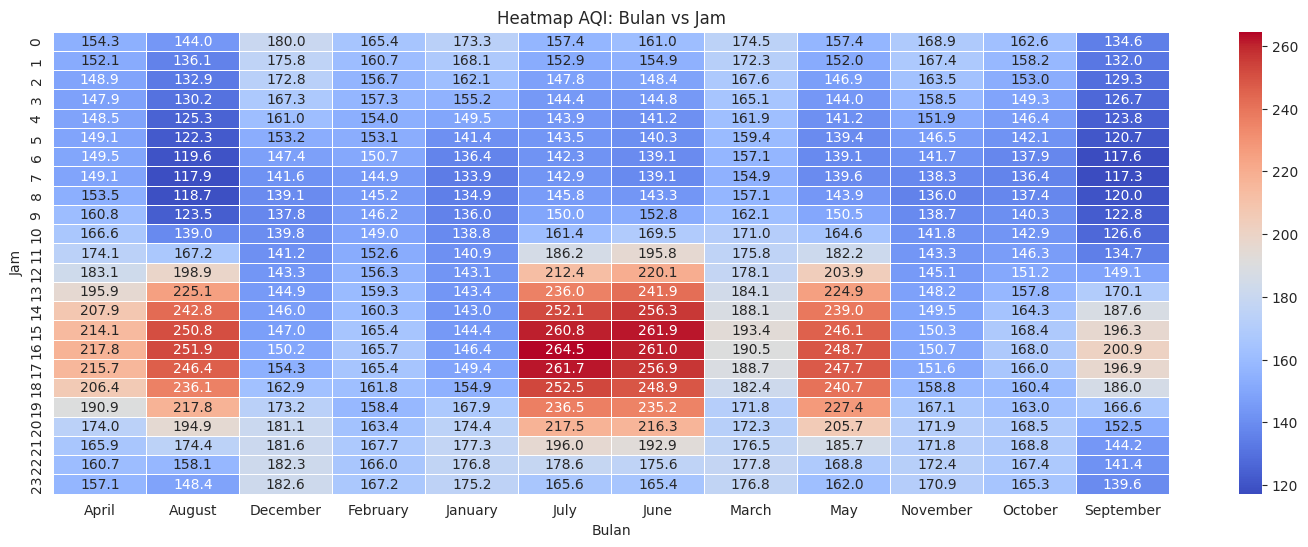

In [156]:
air_quality['date'] = pd.to_datetime(air_quality[['year', 'month', 'day', 'hour']])
air_quality.set_index('date', inplace=True)

air_quality['Month'] = air_quality.index.month_name()
air_quality['Weekday'] = air_quality.index.day_name()
air_quality['Hour'] = air_quality.index.hour

sns.set_style('whitegrid')

yearly = air_quality.groupby('year')['AQI'].mean()
plt.figure(figsize=(15, 5))
plt.plot(yearly.index, yearly.values, marker='s', linestyle='-', color='b')
plt.title('Rata-rata AQI per Tahun')
plt.xlabel('Tahun')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


heatmap_data = air_quality.pivot_table(index='Hour', columns='Month', values='AQI', aggfunc='mean')

plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap AQI: Bulan vs Jam')
plt.xlabel('Bulan')
plt.ylabel('Jam')
plt.show()

In [157]:
print(air_quality['Category_AQI'].value_counts())

Category_AQI
Moderate                          197703
Good                              102419
Unhealthy for Sensitive Groups     89326
Unhealthy                          27230
Hazardous                           4090
Name: count, dtype: int64


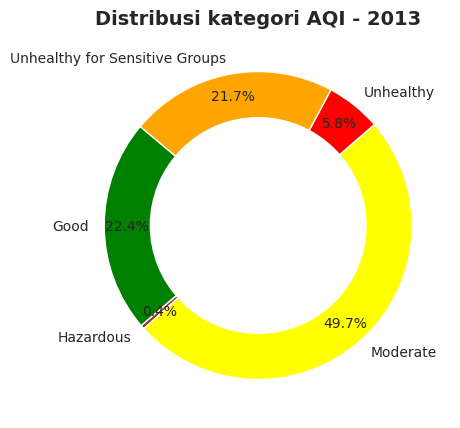

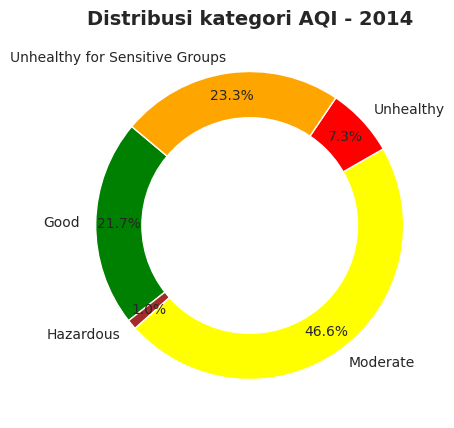

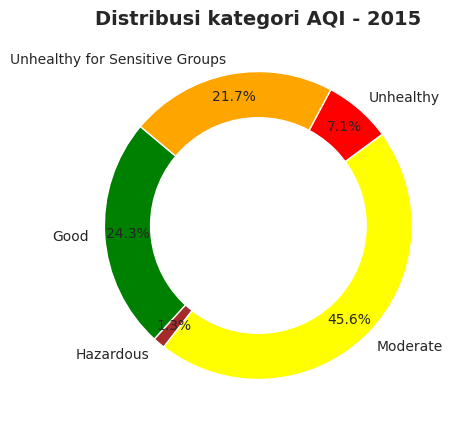

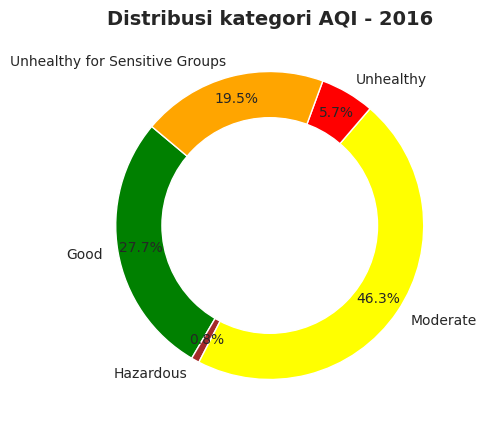

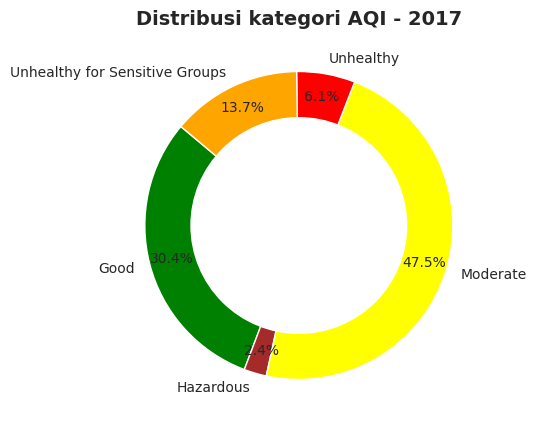

In [158]:
colors = {
    'Good': 'green',
    'Moderate': 'yellow',
    'Unhealthy for Sensitive Groups': 'orange',
    'Unhealthy': 'red',
    'Hazardous': 'brown'
}

AQI_counts = air_quality.groupby(['year', 'Category_AQI']).size().reset_index(name='Count')
years = AQI_counts['year'].unique()

for year in years:
    year_dt = AQI_counts[AQI_counts['year'] == year]
    plt.figure(figsize=(14, 5))
    plt.pie(
        year_dt['Count'],
        labels=year_dt['Category_AQI'],
        colors=[colors[c] for c in year_dt['Category_AQI']],
        autopct='%1.1f%%',
        pctdistance=0.85,
        startangle=140
    )
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)
    plt.title(f'Distribusi kategori AQI - {year}', fontsize=14, fontweight='bold')
    plt.show()



**Insight:**

- Polusi Terparah terjadi pada tahun 2014 lalu mengalami penurunan di 2015
- Kualitas udara setiap tahun masuk dalam kategori Modeate atau dalam kondisi sedang, yang artinya tidak bersih namun belum terlalu berbahaya
- Kualitas udara berkategori Good mengalami peningkatan dari tahun 2013-2016
- Polusi tertinggi terjadi pada sore hingga malam pada pukul 15.00 - 19.00 terutama di bulan Juni dan Juli
- Polusi lebih rendah pada dini hari dan pada musim hujan di bulan Desember hingga Januari

### Pertanyaan 2: Kota manakah yang memiliki tingkat polusi udara tertinggi dan terendah berdasarkan rata-rata PM2.5, dan bagaimana perbandingannya dengan polutan lainnya?

In [159]:
station_avg = air_quality.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()
station_avg = station_avg.sort_values(by='PM2.5', ascending=False)
display(station_avg)

,station,PM2.5,PM10,SO2,NO2,CO,O3
3,Dongsi,86.063363,110.142778,18.451444,53.657559,1345.100583,57.470922
11,Wanshouxigong,84.987862,112.256916,17.298882,55.594739,1374.469621,55.757621
7,Nongzhanguan,84.873507,109.093026,18.691928,58.088518,1328.966556,58.454709
5,Gucheng,83.903958,118.948966,15.384377,55.864178,1337.243492,57.647866
10,Wanliu,83.346523,110.470833,18.384049,65.226668,1337.473951,47.385624
4,Guanyuan,82.912106,108.984715,17.591275,57.934782,1278.333164,55.070416
0,Aotizhongxin,82.454091,110.023734,17.482383,59.247512,1265.954755,55.450894
9,Tiantan,82.116930,106.408574,14.527983,53.221648,1304.475484,55.955759
8,Shunyi,79.361823,98.637740,13.435046,43.699950,1179.847019,54.790208
1,Changping,71.061705,94.589089,14.918742,44.146451,1150.682899,58.006110


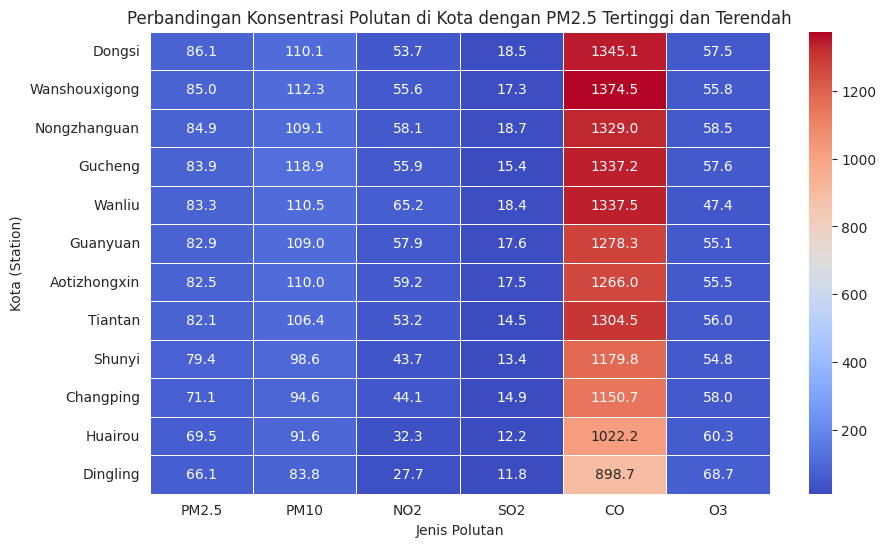

In [160]:
plt.figure(figsize=(10, 6))
sns.heatmap(station_avg.set_index('station')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']],
            cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title('Perbandingan Konsentrasi Polutan di Kota dengan PM2.5 Tertinggi dan Terendah')
plt.xlabel('Jenis Polutan')
plt.ylabel('Kota (Station)')
plt.show()

**Insight:**

- Kota Dongsi memiliki tingkat PM2.5 tertinggi, yaitu sebesar 86.1
- Kota Dingling memiliki tingkat PM2.5 terendah, yaitu sebesar 66.1 dan CO seberar 898.7. Hal ini menunjukkan kualitas udara di kota ini lebih baik dari kota-kota yang lain
- Kota yang memiliki PM2.5 tertinggi juga memiliki CO tinggi. Hal ini menunjukkan hubungan antara CO dan PM2.5 yang disebabkan oleh polusi kendaraan dan industri
- Konsentrasi CO sangat tinggi disemua kota, sedangkan Polutan yang lain relatif lebih merata

### Pertanyaan 3: Bagaimana hubungan faktor cuaca (suhu, kelembaban, curah hujan) dengan tingkat polusi udara?

In [161]:
corr_matrix = air_quality[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'WSPM', 'RAIN']].corr()

display(corr_matrix)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN
PM2.5,1.000000,0.879300,0.478301,0.659130,0.768896,-0.151431,-0.132065,0.020969,-0.269687,-0.014503
PM10,0.879300,1.000000,0.458791,0.645981,0.685239,-0.113030,-0.097182,-0.015983,-0.181619,-0.026718
SO2,0.478301,0.458791,1.000000,0.493196,0.529203,-0.167868,-0.325305,0.227485,-0.106482,-0.040457
NO2,0.659130,0.645981,0.493196,1.000000,0.690565,-0.471191,-0.280735,0.179585,-0.393998,-0.043951
CO,0.768896,0.685239,0.529203,0.690565,1.000000,-0.313041,-0.330868,0.194204,-0.290057,-0.013657
O3,-0.151431,-0.113030,-0.167868,-0.471191,-0.313041,1.000000,0.596453,-0.448674,0.296441,0.023806
TEMP,-0.132065,-0.097182,-0.325305,-0.280735,-0.330868,0.596453,1.000000,-0.813312,0.032601,0.037647
PRES,0.020969,-0.015983,0.227485,0.179585,0.194204,-0.448674,-0.813312,1.000000,0.065400,-0.060952
WSPM,-0.269687,-0.181619,-0.106482,-0.393998,-0.290057,0.296441,0.032601,0.065400,1.000000,0.020975
RAIN,-0.014503,-0.026718,-0.040457,-0.043951,-0.013657,0.023806,0.037647,-0.060952,0.020975,1.000000


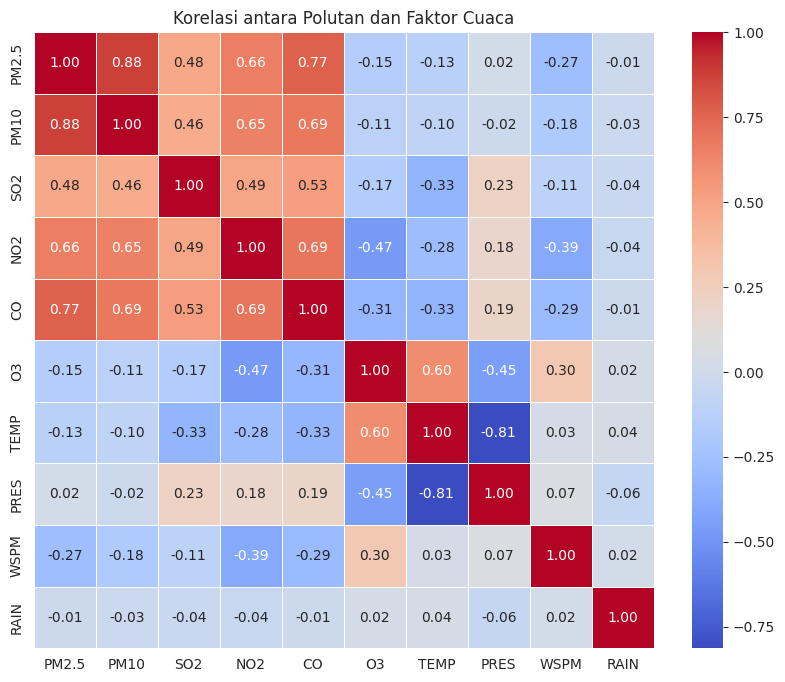

In [162]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Polutan dan Faktor Cuaca')
plt.show()


**Insight:**
- TEMP memiliki korelasi yang positif dengan O3 sebesar 0.60 yang berarti semakin tinggi suhu, maka semakin tinggi kadar ozon diudara. Sedangkan pada polutan yang lain (PM2.5, PM10, SO2, NO2, CO), menunjukkan korelasi yang negatif dengan suhu. Artinya, suhu yang lebih tinggi cenderung menurunkan polutan ini.
- tekanan udara memiliki korelasi negatif dengan O3 sebesar -0.45 dan dengan TEMP sebesar -0.81 yang menunjukkan bahwa tekanan udara yang tinggi biasanya terjadi pada kondisi cuaca yang lebih dingin
- Kecepatan angin berkorelasi negatif dengan beberapa polutan terutama NO2 sebesar -3.9 yang menunjukkan bahwa aingin yang lebih kencang dapat menyebarkan polusi udara
- Korelasi antara hujan dan polutan relatif kecil. Hal ini menunjukkan bahwa hujan dapat membantu membersihkan polutan di udara

## Conclusion

- Pertanyaan 1: Bagaimana pola temporal tingkat polusi udara serta distribusi kualitas udara dari tahun 2013 hingga 2017?
> Puncak polusi terburuk terjadi pada tahun 2014, tetapi mengalami penurunan di tahun 2015. Polusi lebih tinggi terjadi di sore hingga malam hari (15.00-19.00), terutama di musim kemarau bulan Juni dan Juli, Sedangkan udara lebih bersih saat dini hari dan pada saat musim hujan bulan Desember hingga Januari. Mayoritas kualitas udara setiap tahun dominan dalam kategori "Moderate", yang berarti udara tidak sepenuhnya besih namun belum terlalu buruk, sedangkan kategori "Good" mengalami peningkatan dari tahun 2013 hingga 2016.

- Pertanyaan 2: Kota manakah yang memiliki tingkat polusi udara tertinggi dan terendah berdasarkan rata-rata PM2.5, dan bagaimana perbandingannya dengan polutan lainnya?
> Kota Dongsi memiliki tingkat PM2.5 tertinggi sebesar 86.1, sedangkan Kota Dingling memiliki PM2.5 terendah sebesar 66.1. Hal ini menunjukkan bahwa Kota Dingling memiliki kualitas udara lebih baik dari kota-kota yang lain. Karena jika diperhatikan, kota dengan tingkat PM2.5 tinggi juga memiliki CO yang tinggi pula, hal ini terjadi karena polusi yang berasal dari kendaraan dan industri. Sedangkan untuk konsentrasi polutan yang lain cenderung merata disetiap kota.

- Pertanyaan 3: Bagaimana hubungan faktor cuaca (suhu, kelembaban, curah hujan) dengan tingkat polusi udara?
 > Suhu yang tinggi dapat meningkatkan kadar O3 tetapi menurunkan polutan lain seperti PM2.5, PM10, SO2, NO2, dan CO. Tekanan udara tinggi terjadi ketika cuaca dingin, sementara angin kencang membantu menyebarkan polusi, terutama NO2. Hujan Berpengaruh kecil terhadap polutan dan dapat membantu membersihkan udara dari polusi.

In [163]:
air_quality.to_csv("all_data.csv", index=False)

In [164]:
!pip freeze > requirements.txt